Implementation of Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Activation Functions and Their Derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

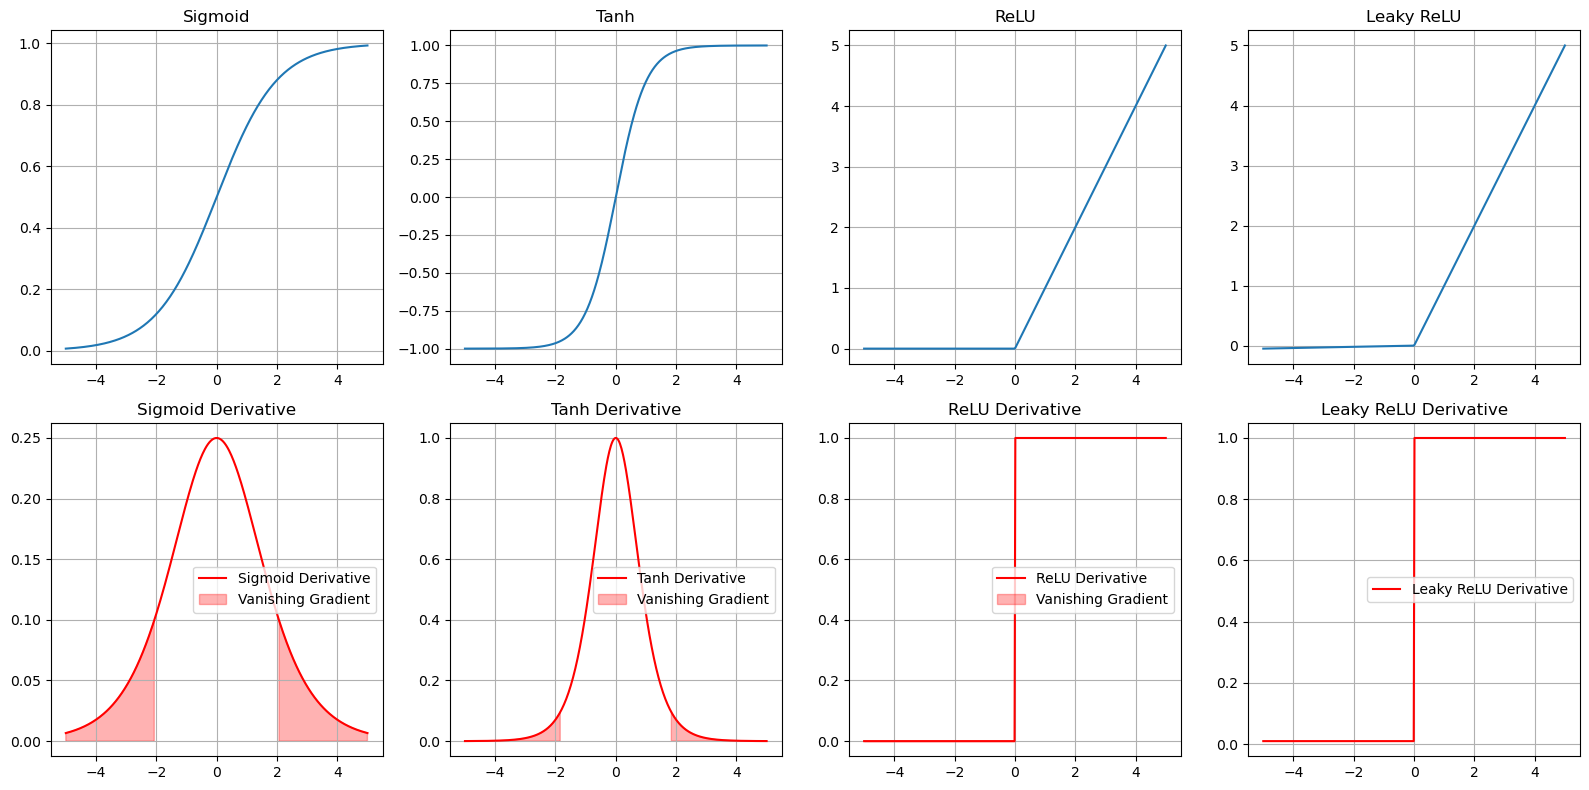

In [2]:
# Plot Activation Functions and Their Derivatives
x = np.linspace(-5, 5, 400)
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

functions = [(sigmoid, sigmoid_derivative, "Sigmoid"),
             (tanh, tanh_derivative, "Tanh"),
             (relu, relu_derivative, "ReLU"),
             (leaky_relu, leaky_relu_derivative, "Leaky ReLU")]

for i, (func, dfunc, name) in enumerate(functions):
    y = func(x)
    dy = dfunc(x)
    axs[0, i].plot(x, y, label=name)
    axs[0, i].set_title(name)
    axs[0, i].grid()
    axs[1, i].plot(x, dy, label=f"{name} Derivative", color='r')
    axs[1, i].set_title(f"{name} Derivative")
    axs[1, i].grid()
    
    # Highlight regions where gradients vanish
    if name in ["Sigmoid", "Tanh"]:
        axs[1, i].fill_between(x, dy, where=np.abs(dy) < 0.1, color='red', alpha=0.3, label='Vanishing Gradient')
    elif name == "ReLU":
        axs[1, i].fill_between(x, dy, where=(x < 0), color='red', alpha=0.3, label='Vanishing Gradient')
    axs[1, i].legend()

plt.tight_layout()
plt.show()